   ## Loading data

In [1]:
import pandas as pd

In [2]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Houston')[0]   ##grab data from wikipedia
df

,#,Name,Location relative to Downtown Houston,Approximate boundaries
0,1,Willowbrook,Northwest,Along Texas State Highway 249 northwest of Bel...
1,2,Greater Greenspoint,North,Around the junction of Beltway 8 and Interstat...
2,3,Carverdale,Northwest,South of the junction of Beltway 8 and U.S. Ro...
3,4,Fairbanks / Northwest Crossing,Northwest,Along U.S. Route 290 between Interstate 610 an...
4,5,Greater Inwood,Northwest,North of Fairbanks / Northwest Crossing and ea...
...,...,...,...,...
83,84,Spring Branch North,Northwest,"East of Beltway 8, south of Clay Road, west of..."
84,85,Spring Branch Central,Northwest,Between Blalock Road and Bingle Road north of ...
85,86,Spring Branch East,Northwest,"Enclosed by Blalock Road, Highway 290, Interst..."
86,87,Greenway / Upper Kirby,Southwest,Along Interstate 69 between Bissonnet Road and...


In [3]:
!pip install geocoder

In [4]:
import geocoder # import geocoder
neighborhood = df['Name']

# Using while Statement
latitude = []
longitude = []
n = 0

while n < len(neighborhood):
    g = geocoder.arcgis('{}, Houston, Texas'.format(neighborhood[n]))
    lat_lng_coords = g.latlng
    print('The geograpical coordinate of {} are {}, {}.'.format(neighborhood[n], lat_lng_coords[0], lat_lng_coords[1]))
    latitude.append(lat_lng_coords[0])
    longitude.append(lat_lng_coords[1])
    n = n + 1

df['Latitude'] = latitude
df['Longitude'] = longitude

The geograpical coordinate of Willowbrook are 29.95240000000007, -95.54462999999998.
The geograpical coordinate of Greater Greenspoint are 29.939670000000035, -95.40747999999996.
The geograpical coordinate of Carverdale are 29.849590000000035, -95.54244999999997.
The geograpical coordinate of Fairbanks / Northwest Crossing are 29.849380000000053, -95.51087999999999.
The geograpical coordinate of Greater Inwood are 29.869770000000074, -95.48043999999999.
The geograpical coordinate of Acres Home are 29.87047000000007, -95.43535999999995.
The geograpical coordinate of Hidden Valley are 29.88847000000004, -95.41459999999995.
The geograpical coordinate of Westbranch are 29.83937000000003, -95.55360999999999.
The geograpical coordinate of Addicks / Park Ten are 29.814340000000072, -95.61592999999999.
The geograpical coordinate of Spring Branch West are 29.801100000000076, -95.54932999999994.
The geograpical coordinate of Langwood are 29.826440000000048, -95.48876999999999.
The geograpical co

In [5]:
df.head(12)

,#,Name,Location relative to Downtown Houston,Approximate boundaries,Latitude,Longitude
0,1,Willowbrook,Northwest,Along Texas State Highway 249 northwest of Bel...,29.95240,-95.54463
1,2,Greater Greenspoint,North,Around the junction of Beltway 8 and Interstat...,29.93967,-95.40748
2,3,Carverdale,Northwest,South of the junction of Beltway 8 and U.S. Ro...,29.84959,-95.54245
3,4,Fairbanks / Northwest Crossing,Northwest,Along U.S. Route 290 between Interstate 610 an...,29.84938,-95.51088
4,5,Greater Inwood,Northwest,North of Fairbanks / Northwest Crossing and ea...,29.86977,-95.48044
5,6,Acres Home,Northwest,West of Interstate 45 North and south of State...,29.87047,-95.43536
6,7,Hidden Valley,North,In a triangular area between Veterans Memorial...,29.88847,-95.41460
7,8,Westbranch,West,Along Beltway 8 south of Jersey Village,29.83937,-95.55361
8,9,Addicks / Park Ten,West,Includes the entirety of Addicks Reservoir and...,29.81434,-95.61593
9,10,Spring Branch West,West,North of Interstate 10 west between Addicks Re...,29.80110,-95.54933


## To simplify things, we will look only within a 5 mile radius of downtown Houston

In [6]:
from math import sqrt

drop_indices = []

for row in range(len(df)):
    if (sqrt(abs(-95.3573 - df.iloc[row,5])*abs(-95.3573 - df.iloc[row,5]) + abs(29.7560-df.iloc[row,4])*abs(29.7560-df.iloc[row,4]))) > 0.07:   ## calculate radius around downtown and use to drop
       drop_indices.append(row)

df_zoom=df.drop(drop_indices)
df_zoom

,#,Name,Location relative to Downtown Houston,Approximate boundaries,Latitude,Longitude
14,15,Greater Heights,Northwest,"East of White Oak Bayou, south of Interstate 6...",29.796250,-95.39487
23,24,Neartown / Montrose,Southwest,Straddles Montrose Boulevard east of Shepherd ...,29.742810,-95.39728
27,28,University Place,Southwest,"East of Kirby Drive, south of Interstate 69, w...",29.719490,-95.40643
31,32,Braeswood,Southwest,Along north bank of Brays Bayou immediately ea...,29.705829,-95.39473
32,33,Medical Center,South,South of Hermann Park between Main Street and ...,29.711790,-95.39315
45,46,Jensen,Northeast,North of Interstate 610 between Hardy Toll Roa...,29.799362,-95.34218
50,51,Northside Village,North,"Enclosed by Interstate 10, Interstate 45, Inte...",29.783340,-95.35496
51,52,Kashmere Gardens,Northeast,Inside Interstate 610 west of Elysian Street a...,29.803110,-95.31298
54,55,Greater Fifth Ward,Northeast,"North of Buffalo Bayou, east of Elysian Street...",29.780000,-95.32484
55,56,Denver Harbor / Port Houston,East,"East of Lockwood Drive, south of Liberty Road,...",29.778120,-95.30118


In [7]:
!pip install folium
!pip install requests
import folium # plotting library
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np
import requests

## Generate neighbourhood map

In [8]:
map_houston_zoom = folium.Map(location=[29.7604,-95.3698],zoom_start=12)

for lat,lng,neighborhood in zip(df_zoom['Latitude'],df_zoom['Longitude'],df_zoom['Name']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_houston_zoom)
map_houston_zoom

### Login to Foursquare API

In [9]:
# @hiddel_cell
CLIENT_ID = 'CT350G1NM11YZQX2UO0NYLRICXYQXFJRNBDAVY1WQLA42HPN' # my Foursquare ID
CLIENT_SECRET = 'C2LDXJJD1C1ZBVEPOL10G53RSX34AYLW1NDDEPJS3C2KYEOW' # my Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: '+CLIENT_ID)
print('CLIENT_SECRET: '+CLIENT_SECRET)

Your credentails:
CLIENT_ID: CT350G1NM11YZQX2UO0NYLRICXYQXFJRNBDAVY1WQLA42HPN
CLIENT_SECRET: C2LDXJJD1C1ZBVEPOL10G53RSX34AYLW1NDDEPJS3C2KYEOW


### Get venue data

In [10]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng,            
            v['venue']['name'], 
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Location', 
                  'Location Latitude', 
                  'Location Longitude', 
                  'Venue',
                  'Venue id',                
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category'        
                   ]
    
    return(nearby_venues)

In [11]:
houston_data_venues = getNearbyVenues(names=df_zoom['Name'],
                                   latitudes=df_zoom['Latitude'],
                                   longitudes=df_zoom['Longitude']
                                  )

Greater Heights
Neartown / Montrose
University Place
Braeswood
Medical Center
Jensen
Northside Village
Kashmere Gardens
Greater Fifth Ward
Denver Harbor / Port Houston
Fourth Ward
Downtown
Midtown
Second Ward
Greater Eastwood
Museum Park (formerly Binz)
Greater Third Ward
Greater OST / South Union
Magnolia Park
MacGregor
Lawndale / Wayside


In [12]:
print(houston_data_venues.shape)
houston_data_venues

(907, 8)


,Location,Location Latitude,Location Longitude,Venue,Venue id,Venue Latitude,Venue Longitude,Venue Category
0,Greater Heights,29.79625,-95.39487,The Wilde Collection,55f4747d498e264103800fc3,29.797920,-95.398890,Gift Shop
1,Greater Heights,29.79625,-95.39487,Buchanan's Native Plants,4b815eb9f964a52008a230e3,29.791149,-95.391761,Flower Shop
2,Greater Heights,29.79625,-95.39487,C&D Hardware,4c080654bbc676b017e345d5,29.790616,-95.394925,Hardware Store
3,Greater Heights,29.79625,-95.39487,La Paz Day Spa,4b48f230f964a520c75e26e3,29.796223,-95.398476,Spa
4,Greater Heights,29.79625,-95.39487,Boil House,5336c9c1498ed5a1954a9c52,29.790677,-95.391692,Cajun / Creole Restaurant
...,...,...,...,...,...,...,...,...
902,Lawndale / Wayside,29.72270,-95.30594,La Michoacana,4b96994ef964a5209bd734e3,29.721831,-95.297839,Grocery Store
903,Lawndale / Wayside,29.72270,-95.30594,Farmers Insurance,564500c1498edf3cd0e17245,29.717657,-95.299834,Insurance Office
904,Lawndale / Wayside,29.72270,-95.30594,Mobile Star,4eff371dc5126f14b6e7c873,29.714966,-95.306143,Electronics Store
905,Lawndale / Wayside,29.72270,-95.30594,Clara Vision,5a92a89ce075505209ec0fd3,29.730010,-95.310781,Doctor's Office


In [13]:
print('There are {} unique venue categories.'.format(len(houston_data_venues['Venue Category'].unique())))

There are 202 unique venue categories.


In [14]:
print('There are {} unique venues.'.format(len(houston_data_venues['Venue id'].unique())))

There are 855 unique venues.


### Drop anything that isn't a restauarnt

In [15]:
drop_indices = []

for row in range(len(houston_data_venues)):
    if 'Restaurant' not in houston_data_venues.iloc[row,7]:
       drop_indices.append(row)

df_venue=houston_data_venues.drop(drop_indices)
df_venue

,Location,Location Latitude,Location Longitude,Venue,Venue id,Venue Latitude,Venue Longitude,Venue Category
4,Greater Heights,29.79625,-95.39487,Boil House,5336c9c1498ed5a1954a9c52,29.790677,-95.391692,Cajun / Creole Restaurant
8,Greater Heights,29.79625,-95.39487,Field & Tides,5848493f45005e1139a77b33,29.790978,-95.389709,New American Restaurant
15,Greater Heights,29.79625,-95.39487,Down House,4da36a0b22a5f04d8f2b2455,29.802214,-95.399355,New American Restaurant
19,Greater Heights,29.79625,-95.39487,Liberty Kitchen & Oyster Bar,4e7249a6b0fb9f3b35292560,29.790546,-95.387415,Seafood Restaurant
21,Greater Heights,29.79625,-95.39487,Calle Onze,5b268a5b5c6838002c3f6c6c,29.790577,-95.399746,Mexican Restaurant
...,...,...,...,...,...,...,...,...
877,Magnolia Park,29.73228,-95.29223,Dona Chelas,4c5ee8a22815c9287bc4b867,29.739082,-95.286939,Restaurant
887,MacGregor,29.71150,-95.35603,Timmy Chans,4bd1d71d462cb713affbda07,29.703205,-95.359468,Chinese Restaurant
891,MacGregor,29.71150,-95.35603,Wendy's,592354cd780eee7403da2b10,29.702942,-95.357542,Fast Food Restaurant
899,Lawndale / Wayside,29.72270,-95.30594,Golden Seafood Restaurant,4ceadb1c678aa0930da7f5ea,29.721861,-95.297821,Seafood Restaurant


In [16]:
df_venue_grouped=df_venue.groupby('Venue Category').nunique()
df_venue_grouped

,Location,Location Latitude,Location Longitude,Venue,Venue id,Venue Latitude,Venue Longitude,Venue Category
Venue Category,,,,,,,,
American Restaurant,9,9,9,16,17,17,17,1
Asian Restaurant,2,2,2,2,2,2,2,1
Cajun / Creole Restaurant,4,4,4,4,4,4,4,1
Caribbean Restaurant,1,1,1,1,1,1,1,1
Chinese Restaurant,5,5,5,5,5,5,5,1
Dumpling Restaurant,2,2,2,2,2,2,2,1
Fast Food Restaurant,12,12,12,6,17,17,17,1
French Restaurant,4,4,4,5,5,5,5,1
Greek Restaurant,3,3,3,3,3,3,3,1


### Hotcode venue data and group by neighborhood

In [17]:
# one hot encoding
houston_onehot = pd.get_dummies(df_venue[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
houston_onehot['Neighborhood'] = df_venue['Location'] 

# move neighborhood column to the first column
fixed_columns = [houston_onehot.columns[-1]] + list(houston_onehot.columns[:-1])
houston_onehot = houston_onehot[fixed_columns]
houston_grouped = houston_onehot.groupby('Neighborhood').mean().reset_index()
houston_onehot.head(5)

,Neighborhood,American Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant,Greek Restaurant,...,Seafood Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Szechuan Restaurant,Tex-Mex Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
4,Greater Heights,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Greater Heights,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,Greater Heights,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,Greater Heights,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
21,Greater Heights,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
num_top_venues = 5
for hood in houston_grouped['Neighborhood']:
    print("---- "+hood+" ----")
    temp =houston_grouped[houston_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Braeswood ----
                  venue  freq
0   American Restaurant  0.38
1            Restaurant  0.38
2    Mexican Restaurant  0.15
3    Chinese Restaurant  0.08
4  Caribbean Restaurant  0.00


---- Denver Harbor / Port Houston ----
                       venue  freq
0         Mexican Restaurant  0.43
1       Fast Food Restaurant  0.29
2  Latin American Restaurant  0.14
3        American Restaurant  0.14
4         Chinese Restaurant  0.00


---- Downtown ----
                             venue  freq
0               Italian Restaurant  0.22
1               Mexican Restaurant  0.17
2          New American Restaurant  0.13
3  Southern / Soul Food Restaurant  0.09
4              American Restaurant  0.09


---- Fourth Ward ----
                           venue  freq
0            American Restaurant  0.08
1             Italian Restaurant  0.08
2  Vegetarian / Vegan Restaurant  0.08
3                Thai Restaurant  0.08
4               Sushi Restaurant  0.08


---- Greater Eastwood 

### Sort data by most common venue

In [19]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [20]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = houston_grouped['Neighborhood']

for ind in np.arange(houston_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(houston_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Braeswood,American Restaurant,Restaurant,Mexican Restaurant,Chinese Restaurant,Latin American Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Dumpling Restaurant,Fast Food Restaurant
1,Denver Harbor / Port Houston,Mexican Restaurant,Fast Food Restaurant,American Restaurant,Latin American Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Dumpling Restaurant,French Restaurant
2,Downtown,Italian Restaurant,Mexican Restaurant,New American Restaurant,American Restaurant,Southern / Soul Food Restaurant,Cajun / Creole Restaurant,Dumpling Restaurant,French Restaurant,Hawaiian Restaurant,Indian Restaurant
3,Fourth Ward,Vietnamese Restaurant,Seafood Restaurant,Italian Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Mexican Restaurant,Portuguese Restaurant,Restaurant,Mediterranean Restaurant,American Restaurant
4,Greater Eastwood,Latin American Restaurant,Thai Restaurant,Fast Food Restaurant,Italian Restaurant,Mexican Restaurant,Vietnamese Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant


## K-means Clustering

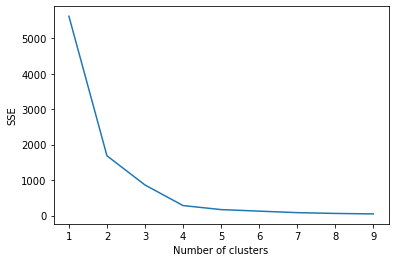

In [21]:
import matplotlib.pyplot as plt
sse = {}
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(df_venue_grouped.drop('Venue',axis=1))
    df_venue_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In [22]:
# set number of clusters
kclusters = 4

houston_grouped_clustering = houston_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(houston_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 1, 2, 2, 2, 2, 3, 1, 3, 3], dtype=int32)

### Need to rename the neighborhood column as it was imported from wikipedia as "Names"

In [23]:
df_zoom2 = df_zoom.rename(columns = {"Name":"Neighborhood"})

In [24]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

houston_merged = df_zoom2

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
houston_merged = houston_merged.merge(neighborhoods_venues_sorted,on='Neighborhood',how='left')

houston_merged # check the last columns!

,#,Neighborhood,Location relative to Downtown Houston,Approximate boundaries,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,15,Greater Heights,Northwest,"East of White Oak Bayou, south of Interstate 6...",29.796250,-95.39487,2.0,Mexican Restaurant,New American Restaurant,Vietnamese Restaurant,Seafood Restaurant,Cajun / Creole Restaurant,Greek Restaurant,Vegetarian / Vegan Restaurant,Restaurant,American Restaurant,Tex-Mex Restaurant
1,24,Neartown / Montrose,Southwest,Straddles Montrose Boulevard east of Shepherd ...,29.742810,-95.39728,2.0,Italian Restaurant,Mediterranean Restaurant,New American Restaurant,Japanese Restaurant,Mexican Restaurant,Ramen Restaurant,Greek Restaurant,Vietnamese Restaurant,Szechuan Restaurant,Southern / Soul Food Restaurant
2,28,University Place,Southwest,"East of Kirby Drive, south of Interstate 69, w...",29.719490,-95.40643,2.0,American Restaurant,Italian Restaurant,Southern / Soul Food Restaurant,French Restaurant,Greek Restaurant,Mexican Restaurant,New American Restaurant,Restaurant,Mediterranean Restaurant,Turkish Restaurant
3,32,Braeswood,Southwest,Along north bank of Brays Bayou immediately ea...,29.705829,-95.39473,0.0,American Restaurant,Restaurant,Mexican Restaurant,Chinese Restaurant,Latin American Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Dumpling Restaurant,Fast Food Restaurant
4,33,Medical Center,South,South of Hermann Park between Main Street and ...,29.711790,-95.39315,0.0,American Restaurant,Restaurant,Mexican Restaurant,Latin American Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Dumpling Restaurant,Fast Food Restaurant
5,46,Jensen,Northeast,North of Interstate 610 between Hardy Toll Roa...,29.799362,-95.34218,1.0,Fast Food Restaurant,Mexican Restaurant,Vietnamese Restaurant,Latin American Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Dumpling Restaurant,French Restaurant
6,51,Northside Village,North,"Enclosed by Interstate 10, Interstate 45, Inte...",29.783340,-95.35496,1.0,Mexican Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Latin American Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Dumpling Restaurant,French Restaurant
7,52,Kashmere Gardens,Northeast,Inside Interstate 610 west of Elysian Street a...,29.803110,-95.31298,3.0,Fast Food Restaurant,Chinese Restaurant,Seafood Restaurant,Vietnamese Restaurant,Latin American Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Dumpling Restaurant,French Restaurant
8,55,Greater Fifth Ward,Northeast,"North of Buffalo Bayou, east of Elysian Street...",29.780000,-95.32484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,56,Denver Harbor / Port Houston,East,"East of Lockwood Drive, south of Liberty Road,...",29.778120,-95.30118,1.0,Mexican Restaurant,Fast Food Restaurant,American Restaurant,Latin American Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Dumpling Restaurant,French Restaurant


In [25]:
houston_merged=houston_merged[houston_merged['Cluster Labels'].notna()]
houston_merged

,#,Neighborhood,Location relative to Downtown Houston,Approximate boundaries,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,15,Greater Heights,Northwest,"East of White Oak Bayou, south of Interstate 6...",29.796250,-95.39487,2.0,Mexican Restaurant,New American Restaurant,Vietnamese Restaurant,Seafood Restaurant,Cajun / Creole Restaurant,Greek Restaurant,Vegetarian / Vegan Restaurant,Restaurant,American Restaurant,Tex-Mex Restaurant
1,24,Neartown / Montrose,Southwest,Straddles Montrose Boulevard east of Shepherd ...,29.742810,-95.39728,2.0,Italian Restaurant,Mediterranean Restaurant,New American Restaurant,Japanese Restaurant,Mexican Restaurant,Ramen Restaurant,Greek Restaurant,Vietnamese Restaurant,Szechuan Restaurant,Southern / Soul Food Restaurant
2,28,University Place,Southwest,"East of Kirby Drive, south of Interstate 69, w...",29.719490,-95.40643,2.0,American Restaurant,Italian Restaurant,Southern / Soul Food Restaurant,French Restaurant,Greek Restaurant,Mexican Restaurant,New American Restaurant,Restaurant,Mediterranean Restaurant,Turkish Restaurant
3,32,Braeswood,Southwest,Along north bank of Brays Bayou immediately ea...,29.705829,-95.39473,0.0,American Restaurant,Restaurant,Mexican Restaurant,Chinese Restaurant,Latin American Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Dumpling Restaurant,Fast Food Restaurant
4,33,Medical Center,South,South of Hermann Park between Main Street and ...,29.711790,-95.39315,0.0,American Restaurant,Restaurant,Mexican Restaurant,Latin American Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Dumpling Restaurant,Fast Food Restaurant
5,46,Jensen,Northeast,North of Interstate 610 between Hardy Toll Roa...,29.799362,-95.34218,1.0,Fast Food Restaurant,Mexican Restaurant,Vietnamese Restaurant,Latin American Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Dumpling Restaurant,French Restaurant
6,51,Northside Village,North,"Enclosed by Interstate 10, Interstate 45, Inte...",29.783340,-95.35496,1.0,Mexican Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Latin American Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Dumpling Restaurant,French Restaurant
7,52,Kashmere Gardens,Northeast,Inside Interstate 610 west of Elysian Street a...,29.803110,-95.31298,3.0,Fast Food Restaurant,Chinese Restaurant,Seafood Restaurant,Vietnamese Restaurant,Latin American Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Dumpling Restaurant,French Restaurant
9,56,Denver Harbor / Port Houston,East,"East of Lockwood Drive, south of Liberty Road,...",29.778120,-95.30118,1.0,Mexican Restaurant,Fast Food Restaurant,American Restaurant,Latin American Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Dumpling Restaurant,French Restaurant
10,60,Fourth Ward,West,"East of Taft Street, south of Buffalo Bayou, a...",29.757620,-95.38449,2.0,Vietnamese Restaurant,Seafood Restaurant,Italian Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Mexican Restaurant,Portuguese Restaurant,Restaurant,Mediterranean Restaurant,American Restaurant


### Generate cluster map

In [26]:
# create map
map_clusters = folium.Map(location=[29.7604,-95.3698],zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(houston_merged['Latitude'], houston_merged['Longitude'], houston_merged['Neighborhood'], houston_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Investigate clusters

In [27]:
houston_merged.loc[houston_merged['Cluster Labels'] == 0, houston_merged.columns[[1] + list(range(5, houston_merged.shape[1]))]]

,Neighborhood,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Braeswood,-95.39473,0.0,American Restaurant,Restaurant,Mexican Restaurant,Chinese Restaurant,Latin American Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Dumpling Restaurant,Fast Food Restaurant
4,Medical Center,-95.39315,0.0,American Restaurant,Restaurant,Mexican Restaurant,Latin American Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Dumpling Restaurant,Fast Food Restaurant


In [28]:
houston_merged.loc[houston_merged['Cluster Labels'] == 1, houston_merged.columns[[1] + list(range(5, houston_merged.shape[1]))]]

,Neighborhood,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Jensen,-95.34218,1.0,Fast Food Restaurant,Mexican Restaurant,Vietnamese Restaurant,Latin American Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Dumpling Restaurant,French Restaurant
6,Northside Village,-95.35496,1.0,Mexican Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Latin American Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Dumpling Restaurant,French Restaurant
9,Denver Harbor / Port Houston,-95.30118,1.0,Mexican Restaurant,Fast Food Restaurant,American Restaurant,Latin American Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Dumpling Restaurant,French Restaurant
13,Second Ward,-95.32843,1.0,Mexican Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Latin American Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Dumpling Restaurant,French Restaurant
18,Magnolia Park,-95.29223,1.0,Mexican Restaurant,Chinese Restaurant,Fast Food Restaurant,Restaurant,Vietnamese Restaurant,Latin American Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Dumpling Restaurant


In [29]:
houston_merged.loc[houston_merged['Cluster Labels'] == 2, houston_merged.columns[[1] + list(range(5, houston_merged.shape[1]))]]

,Neighborhood,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Greater Heights,-95.39487,2.0,Mexican Restaurant,New American Restaurant,Vietnamese Restaurant,Seafood Restaurant,Cajun / Creole Restaurant,Greek Restaurant,Vegetarian / Vegan Restaurant,Restaurant,American Restaurant,Tex-Mex Restaurant
1,Neartown / Montrose,-95.39728,2.0,Italian Restaurant,Mediterranean Restaurant,New American Restaurant,Japanese Restaurant,Mexican Restaurant,Ramen Restaurant,Greek Restaurant,Vietnamese Restaurant,Szechuan Restaurant,Southern / Soul Food Restaurant
2,University Place,-95.40643,2.0,American Restaurant,Italian Restaurant,Southern / Soul Food Restaurant,French Restaurant,Greek Restaurant,Mexican Restaurant,New American Restaurant,Restaurant,Mediterranean Restaurant,Turkish Restaurant
10,Fourth Ward,-95.38449,2.0,Vietnamese Restaurant,Seafood Restaurant,Italian Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Mexican Restaurant,Portuguese Restaurant,Restaurant,Mediterranean Restaurant,American Restaurant
11,Downtown,-95.35656,2.0,Italian Restaurant,Mexican Restaurant,New American Restaurant,American Restaurant,Southern / Soul Food Restaurant,Cajun / Creole Restaurant,Dumpling Restaurant,French Restaurant,Hawaiian Restaurant,Indian Restaurant
12,Midtown,-95.37687,2.0,Vietnamese Restaurant,Mexican Restaurant,French Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Dumpling Restaurant,Fast Food Restaurant,Italian Restaurant,Mediterranean Restaurant
14,Greater Eastwood,-95.33498,2.0,Latin American Restaurant,Thai Restaurant,Fast Food Restaurant,Italian Restaurant,Mexican Restaurant,Vietnamese Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant
15,Museum Park (formerly Binz),-95.38150,2.0,Southern / Soul Food Restaurant,Mexican Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,French Restaurant,Fast Food Restaurant,American Restaurant,Sushi Restaurant,Caribbean Restaurant,Dumpling Restaurant


In [30]:
houston_merged.loc[houston_merged['Cluster Labels'] == 3, houston_merged.columns[[1] + list(range(5, houston_merged.shape[1]))]]

,Neighborhood,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Kashmere Gardens,-95.31298,3.0,Fast Food Restaurant,Chinese Restaurant,Seafood Restaurant,Vietnamese Restaurant,Latin American Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Dumpling Restaurant,French Restaurant
16,Greater Third Ward,-95.35440,3.0,Fast Food Restaurant,Vietnamese Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Seafood Restaurant,Latin American Restaurant,Caribbean Restaurant,Chinese Restaurant,Dumpling Restaurant,French Restaurant
19,MacGregor,-95.35603,3.0,Chinese Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Dumpling Restaurant,French Restaurant,Greek Restaurant
20,Lawndale / Wayside,-95.30594,3.0,Fast Food Restaurant,Seafood Restaurant,Vietnamese Restaurant,Latin American Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Dumpling Restaurant,French Restaurant


### Comparing the clusters, it appears that clusters 1 and 4 already have an abundance of fast food restaurants. This leaves clusters 0, 2, and 3. Cluster 2 covers the largest area, has few fast food restaurants, and a wide variety of different types of restaurants. As such, the area of focus for a new healthy fast food restaurant is in cluster 2.

In [32]:
cluster2 = houston_merged[houston_merged.iloc[:,6] == 2.0]

### Generate map of target area

In [33]:
# create map
map_clusters = folium.Map(location=[29.7604,-95.3698],zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cluster2['Latitude'], cluster2['Longitude'], cluster2['Neighborhood'], cluster2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters